In [119]:
# Importação dos pacotes necessários
    
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from statsmodels.iolib.summary2 import summary_col
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

In [150]:
df_gera = pd.read_csv('db_balanco_temp_geracao.csv', delimiter=',', encoding="utf-8")
df_gera.head()

#Características das variáveis do dataset
df_gera.info()

#Estatísticas univariadas
df_gera.describe()

#Checando missing values
missing = df_gera.isna().any()
print("Columns with missing values:")
print(missing)

,data,mean,temp_arg,temp_arg_max,temp_arg_min
0,2020-05-01,11726.041667,14.7,19.600000,9.800000
1,2020-05-02,12322.250000,12.7,16.933333,8.466667
2,2020-05-03,11483.250000,16.2,21.600000,10.800000
3,2020-05-04,13317.416667,13.7,18.266667,9.133333
4,2020-05-05,13904.625000,13.3,17.733333,8.866667


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   data          1198 non-null   object 
 1   mean          1198 non-null   float64
 2   temp_arg      1198 non-null   float64
 3   temp_arg_max  1197 non-null   float64
 4   temp_arg_min  1197 non-null   float64
dtypes: float64(4), object(1)
memory usage: 46.9+ KB


,mean,temp_arg,temp_arg_max,temp_arg_min
count,1198.000000,1198.000000,1197.000000,1197.000000
mean,16652.506847,16.923957,21.813478,11.285102
std,2423.024560,6.478644,8.106496,4.320059
min,0.000000,3.300000,4.400000,2.200000
25%,14978.510417,11.700000,15.200000,7.800000
50%,16328.812500,16.750000,20.533333,11.200000
75%,18029.333333,21.675000,27.866667,14.466667
max,24413.708333,34.500000,46.000000,23.000000


Columns with missing values:
data            False
mean            False
temp_arg        False
temp_arg_max     True
temp_arg_min     True
dtype: bool


In [151]:
#Verificamos presença de missing values e valures nulos no dataset

#removendo missing values
df_gera.dropna(inplace=True)

#removendo valores nulos
df_gera = df_gera[df_gera['mean'] != 0]

df_gera.describe()


,mean,temp_arg,temp_arg_max,temp_arg_min
count,1197.000000,1197.000000,1197.000000,1197.000000
mean,16666.418716,16.927652,21.813478,11.285102
std,2375.689801,6.480089,8.106496,4.320059
min,3482.166667,3.300000,4.400000,2.200000
25%,14979.166667,11.700000,15.200000,7.800000
50%,16331.750000,16.800000,20.533333,11.200000
75%,18031.000000,21.700000,27.866667,14.466667
max,24413.708333,34.500000,46.000000,23.000000


In [152]:
# Calculando z-scores para temp_arg e mean
z_scores_temp_arg = (df_gera['temp_arg'] - df_gera['temp_arg'].mean()) / df_gera['temp_arg'].std()
z_scores_mean = (df_gera['mean'] - df_gera['mean'].mean()) / df_gera['mean'].std()

# Definir a thereshold para detecção de anomalias
threshold = 2

# Remover linhas com ocorrência de anomalia
df_gera = df_gera[(np.abs(z_scores_temp_arg) < threshold) & (np.abs(z_scores_mean) < threshold)]

df_gera.describe()

,mean,temp_arg,temp_arg_max,temp_arg_min
count,1134.000000,1134.000000,1134.000000,1134.000000
mean,16421.611033,16.386508,21.418225,10.924339
std,2001.241941,5.965926,7.756367,3.977284
min,12076.125000,4.000000,5.333333,2.666667
25%,14949.489583,11.600000,15.066667,7.733333
50%,16239.541667,16.150000,20.133333,10.766667
75%,17762.093750,21.000000,27.600000,14.000000
max,21414.416667,29.800000,39.733333,19.866667


In [123]:
# Gráfico 3D com scatter

import plotly.io as pio
pio.renderers.default = 'browser'

trace = go.Scatter3d(
    x=df_gera['temp_arg'], 
    y=df_gera['temp_arg_max'], 
    z=df_gera['temp_arg_min'], 
    mode='markers',
    marker={
        'size': 5,
        'opacity': 0.8,
    },
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800,
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)
plot_figure.update_layout(scene = dict(
                        xaxis_title='temp_arg',
                        yaxis_title='temp_arg_max',
                        zaxis_title='temp_arg_min'))
#plot_figure.show()

,mean,temp_arg,temp_arg_max,temp_arg_min
mean,1.000000,0.036038,0.052839,0.036038
temp_arg,0.036038,1.000000,0.929703,1.000000
temp_arg_max,0.052839,0.929703,1.000000,0.929703
temp_arg_min,0.036038,1.000000,0.929703,1.000000


<Figure size 1080x720 with 0 Axes>

<AxesSubplot:>

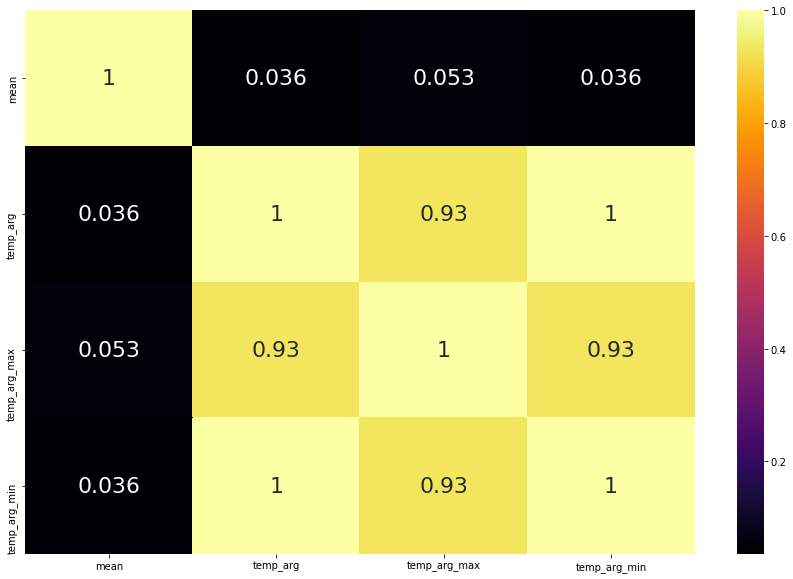

In [124]:
# Matriz de correlações
#dropando coluna date
df_corr = df_gera.drop(columns='data')
# Calculate the correlation matrix
corr = df_corr.corr()
corr

plt.figure(figsize=(15,10))
sns.heatmap(df_corr.corr(), annot=True, cmap = plt.cm.inferno,
            annot_kws={'size':22})
plt.show()

"temp_arg" e "temp_arg_min" com correlação perfeita. Um dos dois pode ser excluído do modelo

In [153]:
# Estimando um modelo múltiplo com as variáveis do dataset 'paises'

#Estimando a regressão múltipla
modelo_OLS = sm.OLS.from_formula("mean ~ temp_arg + temp_arg_max", df_gera).fit()

#Parâmetros do modelo
modelo_OLS.summary()

#Parâmetros do modelo com intervalos de confiança
#Nível de significância de 5% / Nível de confiança de 95%
modelo_OLS.conf_int(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.205
Date:                Sat, 19 Aug 2023   Prob (F-statistic):            0.00562
Time:                        07:41:45   Log-Likelihood:                -10224.
No. Observations:                1134   AIC:                         2.045e+04
Df Residuals:                    1131   BIC:                         2.047e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.599e+04    175.564     91.095      0.000    1.56e+04    1.63e+04
temp_arg       -48.1240     31.488     -1.528      0.127    -109.906      13.658
temp_arg_max    56.8266     24.220      2.346      0.019       9.306     104.347
==============================================================================
Omnibus:                       33.372   Durbin-Watson:                   0.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.151
Skew:                           0.315   Prob(JB):                     7.71e-07
Kurtosis:                       2.553   Cond. No.                         85.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,0,1
Intercept,15648.602770,16337.538846
temp_arg,-109.905640,13.657698
temp_arg_max,9.306265,104.346858


## temp_arg_max não estatísticamente significante como uma variável explicativa. Então vamos excluí-lo

In [154]:
#Estimando a regressão múltipla
modelo_OLS = sm.OLS.from_formula("mean ~ temp_arg", df_gera).fit()

#Parâmetros do modelo
modelo_OLS.summary()

#Parâmetros do modelo com intervalos de confiança
#Nível de significância de 5% / Nível de confiança de 95%
modelo_OLS.conf_int(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.885
Date:                Sat, 19 Aug 2023   Prob (F-statistic):             0.0273
Time:                        07:41:52   Log-Likelihood:                -10226.
No. Observations:                1134   AIC:                         2.046e+04
Df Residuals:                    1132   BIC:                         2.047e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.606e+04    173.483     92.582      0.000    1.57e+04    1.64e+04
temp_arg      21.9878      9.949      2.210      0.027       2.468      41.508
==============================================================================
Omnibus:                       33.876   Durbin-Watson:                   0.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.151
Skew:                           0.326   Prob(JB):                     4.68e-07
Kurtosis:                       2.561   Cond. No.                         51.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,0,1
Intercept,15720.923429,16401.691371
temp_arg,2.467984,41.507661


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='temp_arg', ylabel='mean'>

<AxesSubplot:xlabel='temp_arg', ylabel='mean'>

Text(0.5, 1.0, 'Dispersão dos dados modelo OLS')

Text(0.5, 0, 'Temperatura (Cº)')

Text(0, 0.5, 'Carga (mWe)')

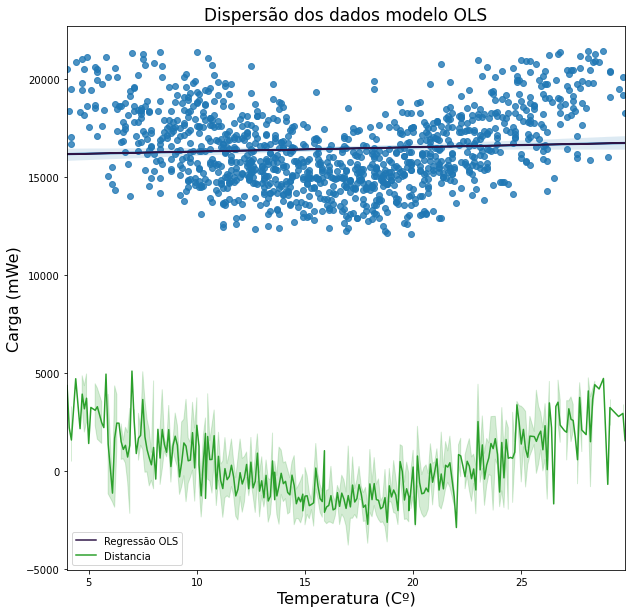

In [155]:
#Plotando gráfico de dispersão com o modelo OLS
plt.figure(figsize=(10,10))
sns.regplot(x="temp_arg", y="mean", data=df_gera,)
plt.plot(df_gera['temp_arg'].to_numpy(), modelo_OLS.fittedvalues.to_numpy(), color='#2e1547', label='Regressão OLS')
sns.lineplot(x=df_gera['temp_arg'].to_numpy(), y=df_gera['mean'].to_numpy() - modelo_OLS.fittedvalues.to_numpy(), color='#2ca02c', label='Distancia')
plt.title('Dispersão dos dados modelo OLS', fontsize=17)
plt.xlabel('Temperatura (Cº)', fontsize=16)
plt.ylabel('Carga (mWe)', fontsize=16)
plt.show()

In [156]:
# Transformação de Box-Cox

#Para o cálculo do lambda de Box-Cox
from scipy.stats import boxcox

#xt é uma variável que traz os valores transformados (Y*)
#'lmbda' é o lambda de Box-Cox
xt, lmbda = boxcox(df_gera['mean'])

print("Primeiros valores: ",xt[:5])
print("Lambda: ",lmbda)

Primeiros valores:  [3.83574029 3.84446507 3.84924502 3.85546392 3.85655669]
Lambda:  -0.23115527166089678


In [157]:
df_gera['bc_mean'] = xt
df_gera

,data,mean,temp_arg,temp_arg_max,temp_arg_min,bc_mean
1,2020-05-02,12322.250000,12.7,16.933333,8.466667,3.835740
3,2020-05-04,13317.416667,13.7,18.266667,9.133333,3.844465
4,2020-05-05,13904.625000,13.3,17.733333,8.866667,3.849245
5,2020-05-06,14717.125000,10.9,14.533333,7.266667,3.855464
6,2020-05-07,14865.875000,12.4,16.533333,8.266667,3.856557
...,...,...,...,...,...,...
1192,2023-08-06,14927.958333,15.5,21.000000,10.333333,3.857009
1193,2023-08-07,17602.625000,10.0,12.000000,6.666667,3.874544
1194,2023-08-08,17595.833333,11.0,14.000000,7.333333,3.874503
1195,2023-08-09,18150.958333,13.0,15.000000,8.666667,3.877734


In [158]:
# Estimando um novo modelo múltiplo com variável dependente
#transformada por Box-Cox

modelo_bc = sm.OLS.from_formula('bc_mean ~  temp_arg', df_gera).fit()

# Parâmetros do modelo
modelo_bc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bc_mean   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.226
Date:                Sat, 19 Aug 2023   Prob (F-statistic):             0.0400
Time:                        07:42:40   Log-Likelihood:                 3329.5
No. Observations:                1134   AIC:                            -6655.
Df Residuals:                    1132   BIC:                            -6645.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8641      0.001   3461.893      0.000       3.862       3.866
temp_arg       0.0001    6.4e-05      2.056      0.040       6e-06       0.000
==============================================================================
Omnibus:                       21.750   Durbin-Watson:                   0.418
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.196
Skew:                          -0.000   Prob(JB):                      0.00225
Kurtosis:                       2.492   Cond. No.                         51.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## temp_arg_max não estatísticamente significante como uma variável explicativa. Então vamos excluí-lo

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='temp_arg', ylabel='mean'>

<AxesSubplot:xlabel='temp_arg', ylabel='mean'>

Text(0.5, 1.0, 'Dispersão dos dados modelo Box-Cox')

Text(0.5, 0, 'Temperatura (Cº)')

Text(0, 0.5, 'Carga (mWe)')

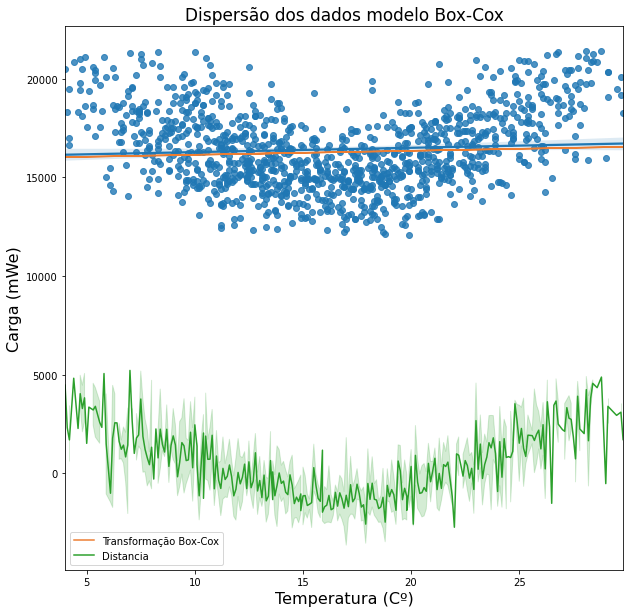

In [159]:
#Plotando gráfico de dispersão com o modelo BoxCox

Ybc = (modelo_bc.fittedvalues.to_numpy()* lmbda + 1) ** (1 / lmbda)

plt.figure(figsize=(10, 10))
sns.regplot(x="temp_arg", y="mean", data=df_gera)
plt.plot(df_gera['temp_arg'].to_numpy(), Ybc, color='#ed7d31', label='Transformação Box-Cox')
sns.lineplot(x=df_gera['temp_arg'].to_numpy(), y=df_gera['mean'].to_numpy() - Ybc, color='#2ca02c', label='Distancia')
plt.legend()
plt.title('Dispersão dos dados modelo Box-Cox', fontsize=17)
plt.xlabel('Temperatura (Cº)', fontsize=16)
plt.ylabel('Carga (mWe)', fontsize=16)
plt.show()

In [160]:
# Resumo dos dois modelos obtidos pelo procedimento Stepwise
#(linear e com Box-Cox)

summary_col([modelo_OLS, modelo_bc],
            model_names=["OLS","BOX-COX"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

,OLS,BOX-COX
Intercept,16061.3074***,3.8641***
,(173.4828),(0.0011)
temp_arg,21.9878**,0.0001**
,(9.9486),(0.0001)
R-squared,0.0043,0.0037
R-squared Adj.,0.0034,0.0028
N,1134,1134


In [161]:
# In[ ]: Não podemos nos esquecer de fazer o cálculo para a obtenção do fitted
#value de Y (retorno)

#Não podemos nos esquecer de fazer o cálculo para a obtenção do fitted value de Y (retorno)
#(fitted * lmbda + 1) ** (1 / lmbda)


# In[ ]: Salvando os fitted values de 'modelo_step_empresas' e
#'modelo_step_empresas_bc'

df_gera['yhat_OLS'] = modelo_OLS.fittedvalues
df_gera['yhat_bc'] = (modelo_bc.fittedvalues* lmbda + 1) ** (1 / lmbda)

#Visualizando os dois fitted values no dataset
#modelos 'modelo_step_empresas e modelo_step_empresas_bc
df_gera[['data','mean','yhat_OLS','yhat_bc']]

,data,mean,yhat_OLS,yhat_bc
1,2020-05-02,12322.250000,16340.552750,16199.603298
3,2020-05-04,13317.416667,16362.540572,16219.653293
4,2020-05-05,13904.625000,16353.745443,16211.629631
5,2020-05-06,14717.125000,16300.974669,16163.590144
6,2020-05-07,14865.875000,16333.956403,16193.594251
...,...,...,...,...
1192,2023-08-06,14927.958333,16402.118653,16255.820334
1193,2023-08-07,17602.625000,16281.185628,16145.620530
1194,2023-08-08,17595.833333,16303.173451,16165.588287
1195,2023-08-09,18150.958333,16347.149096,16205.615091


In [162]:
# Preparar dados para modelo OLS quadratico
xdata = df_gera['temp_arg']
ydata = df_gera['mean']


# Create a DataFrame for the statsmodels OLS
data = {'ydata': ydata, 'xdata': xdata}
df = pd.DataFrame(data)

# Fit the OLS model using statsmodels
modelo_qd = sm.OLS.from_formula('ydata ~ xdata + np.power(xdata, 2)', data=df).fit()
# Parâmetros do modelo
modelo_qd.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ydata   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     308.0
Date:                Sat, 19 Aug 2023   Prob (F-statistic):          1.62e-107
Time:                        07:43:00   Log-Likelihood:                -9982.2
No. Observations:                1134   AIC:                         1.997e+04
Df Residuals:                    1131   BIC:                         1.999e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.373e+04    340.861     69.614      0.000    2.31e+04    2.44e+04
xdata              -1030.1430     43.399    -23.737      0.000   -1115.294    -944.992
np.power(xdata, 2)    31.4837      1.276     24.669      0.000      28.980      33.988
==============================================================================
Omnibus:                        5.619   Durbin-Watson:                   0.794
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.664
Skew:                           0.158   Prob(JB):                       0.0589
Kurtosis:                       2.859   Cond. No.                     2.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='temp_arg', ylabel='mean'>

<AxesSubplot:xlabel='temp_arg', ylabel='mean'>

<AxesSubplot:xlabel='temp_arg', ylabel='mean'>

Text(0.5, 1.0, 'Dados dispersos - modelo quadrático')

Text(0.5, 0, 'Temperatura (Cº)')

Text(0, 0.5, 'Carga (mWe)')

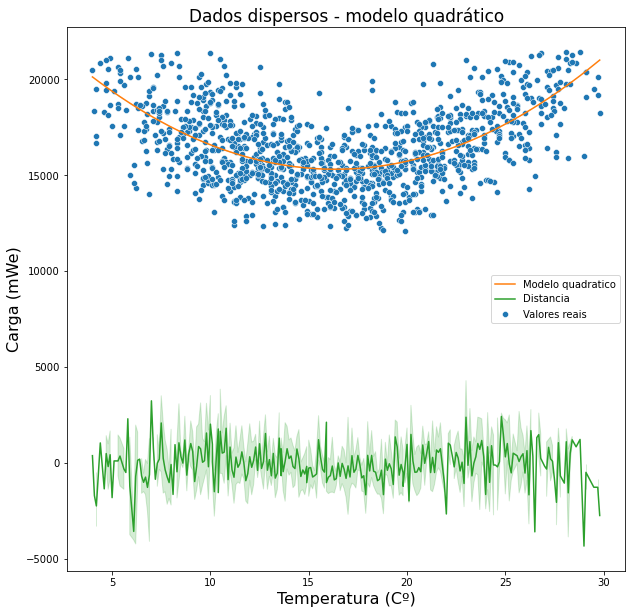

In [163]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="temp_arg", y="mean", data=df_gera, color='#1f77b4', label='Valores reais')
sns.lineplot(x=df_gera['temp_arg'].to_numpy(), y=modelo_qd.fittedvalues.to_numpy(), color='#ff7f0e', label='Modelo quadratico')
sns.lineplot(x=df_gera['temp_arg'].to_numpy(), y=df_gera['mean'].to_numpy() - modelo_qd.fittedvalues.to_numpy(), color='#2ca02c', label='Distancia')
plt.title('Dados dispersos - modelo quadrático', fontsize=17)
plt.xlabel('Temperatura (Cº)', fontsize=16)
plt.ylabel('Carga (mWe)', fontsize=16)
plt.legend()
plt.show()

In [164]:
df_gera['yhat_qd'] = (modelo_qd.fittedvalues)

#Visualizando os dois fitted values no dataset
#modelos 'modelo_step_empresas e modelo_step_empresas_bc
df_gera[['data','mean','yhat_OLS','yhat_bc', 'yhat_qd']]

,data,mean,yhat_OLS,yhat_bc,yhat_qd
1,2020-05-02,12322.250000,16340.552750,16199.603298,15723.733231
3,2020-05-04,13317.416667,16362.540572,16219.653293,15524.759355
4,2020-05-05,13904.625000,16353.745443,16211.629631,15596.792822
5,2020-05-06,14717.125000,16300.974669,16163.590144,16240.563951
6,2020-05-07,14865.875000,16333.956403,16193.594251,15795.704029
...,...,...,...,...,...
1192,2023-08-06,14927.958333,16402.118653,16255.820334,15325.284118
1193,2023-08-07,17602.625000,16281.185628,16145.620530,16575.484651
1194,2023-08-08,17595.833333,16303.173451,16165.588287,16206.498908
1195,2023-08-09,18150.958333,16347.149096,16205.615091,15657.429496


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='temp_arg', ylabel='mean'>

<AxesSubplot:xlabel='temp_arg', ylabel='mean'>

Text(0.5, 1.0, 'Dispersão dos dados modelo Box-Cox')

Text(0.5, 0, 'Temperatura (Cº)')

Text(0, 0.5, 'Carga (mWe)')

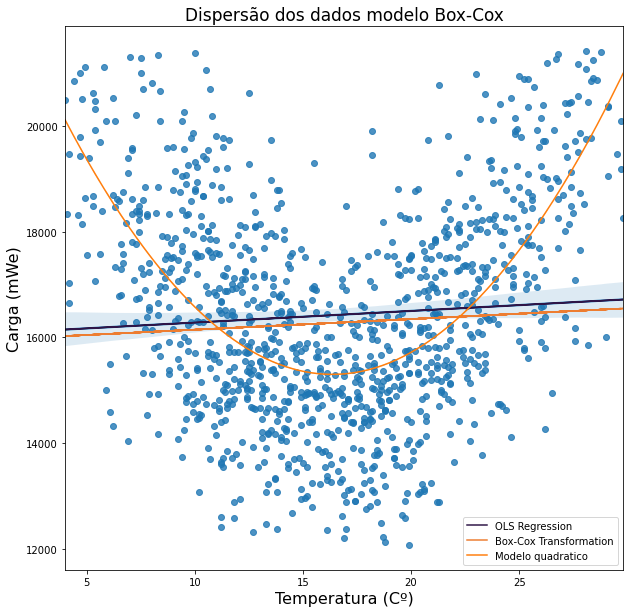

In [165]:


plt.figure(figsize=(10, 10))
sns.regplot(x="temp_arg", y="mean", data=df_gera)
plt.plot(df_gera['temp_arg'].to_numpy(), modelo_OLS.fittedvalues.to_numpy(), color='#2e1547', label='OLS Regression')
plt.plot(df_gera['temp_arg'].to_numpy(), Ybc, color='#ed7d31', label='Box-Cox Transformation')
sns.lineplot(x=df_gera['temp_arg'].to_numpy(), y=modelo_qd.fittedvalues.to_numpy(), color='#ff7f0e', label='Modelo quadratico')
plt.legend()
plt.title('Dispersão dos dados modelo Box-Cox', fontsize=17)
plt.xlabel('Temperatura (Cº)', fontsize=16)
plt.ylabel('Carga (mWe)', fontsize=16)
plt.show()

In [166]:
# Verificando a normalidade dos resíduos do 'modelo_OLS' e 'modelo_bc2'
from sfrancia import shapiroFrancia
# Teste de Shapiro-Francia
sf_test_ols = shapiroFrancia(modelo_OLS.resid.to_numpy())
sf_test_qd = shapiroFrancia(modelo_qd.resid.to_numpy())
sf_test_bc = shapiroFrancia(modelo_bc.resid.to_numpy())

print("p-value ols:", sf_test_ols['p-value'])
print("p-value bc:", sf_test_bc['p-value'])
print("p-value qd:", sf_test_qd['p-value'])


p-value ols: 2.3737436340317287e-08
p-value bc: 0.0002456405502875047
p-value qd: 0.09339216766168873


(array([1.66649986e-05, 3.33299973e-05, 6.66599945e-05, 9.07316592e-05,
        9.25833258e-05, 1.70353319e-04, 2.18496649e-04, 2.16644982e-04,
        1.70353319e-04, 1.62946653e-04, 1.70353319e-04, 1.48133321e-04,
        1.38874989e-04, 9.25833258e-05, 8.88799927e-05, 5.55499955e-05,
        6.29566615e-05, 3.70333303e-05, 4.25883299e-05, 2.40716647e-05]),
 array([-4422.74007372, -3946.50193477, -3470.26379582, -2994.02565687,
        -2517.78751792, -2041.54937897, -1565.31124001, -1089.07310106,
         -612.83496211,  -136.59682316,   339.64131579,   815.87945474,
         1292.11759369,  1768.35573264,  2244.59387159,  2720.83201054,
         3197.07014949,  3673.30828844,  4149.54642739,  4625.78456634,
         5102.02270529]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Resíduos')

Text(0, 0.5, 'Densidade')

Text(0.5, 1.0, 'Resísuos modelo OLS')

Text(0.05, 0.7, 'Shapiro-Francia p-value: 0.0000')

(array([  47.86881023,   47.86881023,   47.86881023,  191.47524092,
         430.81929206, 1196.72025573, 1388.19549664, 2201.96527054,
        2632.7845626 , 4451.79935131, 7515.40320597, 6079.3388991 ,
        5409.17555589, 5887.86365818, 5887.86365818, 3781.6360081 ,
        3829.50481833, 2489.17813191, 1914.75240916, 1675.40835802]),
 array([-2.19170403e-04, -2.01659565e-04, -1.84148728e-04, -1.66637890e-04,
        -1.49127052e-04, -1.31616214e-04, -1.14105377e-04, -9.65945390e-05,
        -7.90837013e-05, -6.15728636e-05, -4.40620258e-05, -2.65511881e-05,
        -9.04035042e-06,  8.47048729e-06,  2.59813250e-05,  4.34921627e-05,
         6.10030004e-05,  7.85138381e-05,  9.60246758e-05,  1.13535514e-04,
         1.31046351e-04]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Resíduos')

Text(0, 0.5, 'Densidade')

Text(0.5, 1.0, 'Resíduos modelo Box-Cox ')

Text(0.05, 0.7, 'Shapiro-Francia p-value: 0.0002')

(array([9.60472278e-06, 1.15256673e-05, 4.41817248e-05, 6.33911703e-05,
        9.22053387e-05, 1.44070842e-04, 1.51754620e-04, 2.49722792e-04,
        2.53564681e-04, 2.40118069e-04, 2.11303901e-04, 1.94015400e-04,
        1.74805955e-04, 1.17177618e-04, 8.26006159e-05, 5.57073921e-05,
        4.03398357e-05, 2.11303901e-05, 9.60472278e-06, 1.15256673e-05]),
 array([-4332.25705619, -3873.19424121, -3414.13142622, -2955.06861123,
        -2496.00579624, -2036.94298126, -1577.88016627, -1118.81735128,
         -659.75453629,  -200.69172131,   258.37109368,   717.43390867,
         1176.49672365,  1635.55953864,  2094.62235363,  2553.68516862,
         3012.7479836 ,  3471.81079859,  3930.87361358,  4389.93642857,
         4848.99924355]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Resíduos')

Text(0, 0.5, 'Densidade')

Text(0.5, 1.0, 'Resísuos modelo quadrático')

Text(0.05, 0.7, 'Shapiro-Francia p-value: 0.0934')

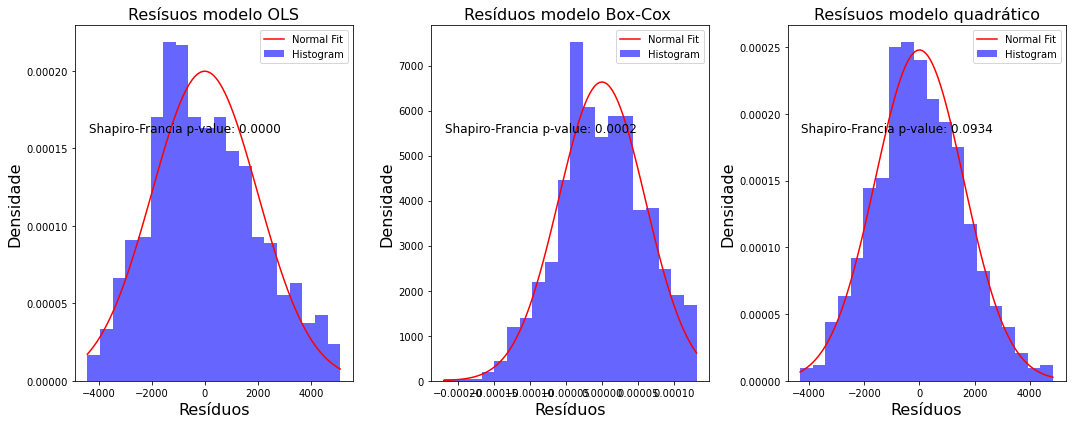

In [167]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Resíduos dos modelos
resid_array_ols = modelo_OLS.resid.to_numpy()
resid_array_qd = modelo_qd.resid.to_numpy()
resid_array_bc = modelo_bc.resid.to_numpy()

# setando a figura com subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Plot OLS
ax = axes[0]
ax.hist(resid_array_ols, bins=20, density=True, color='blue', alpha=0.6, label='Histogram')
x_range_ols = np.linspace(min(resid_array_ols), max(resid_array_ols), 100)
mu_ols, std_ols = norm.fit(resid_array_ols)
pdf_ols = norm.pdf(x_range_ols, mu_ols, std_ols)
ax.plot(x_range_ols, pdf_ols, label="Normal Fit", color='red')
ax.set_xlabel('Resíduos', fontsize=16)
ax.set_ylabel('Densidade', fontsize=16)
ax.set_title('Resísuos modelo OLS', fontsize=16)
ax.annotate(f"Shapiro-Francia p-value: {sf_test_ols['p-value']:.4f}",
            xy=(0.05, 0.7), xycoords='axes fraction', fontsize=12)
ax.legend()

# Plot of BOX-COX
ax = axes[1]
ax.hist(resid_array_bc2, bins=20, density=True, color='blue', alpha=0.6, label='Histogram')
x_range_bc2 = np.linspace(min(resid_array_bc2), max(resid_array_bc2), 100)
mu_bc2, std_bc2 = norm.fit(resid_array_bc2)
pdf_bc2 = norm.pdf(x_range_bc2, mu_bc2, std_bc2)
ax.plot(x_range_bc2, pdf_bc2, label="Normal Fit", color='red')
ax.set_xlabel('Resíduos', fontsize=16)
ax.set_ylabel('Densidade', fontsize=16)
ax.set_title('Resíduos modelo Box-Cox ', fontsize=16)
ax.annotate(f"Shapiro-Francia p-value: {sf_test_bc['p-value']:.4f}",
            xy=(0.05, 0.7), xycoords='axes fraction', fontsize=12)
ax.legend()

# Plot OLS Quadrático
ax = axes[2]
ax.hist(resid_array_qd, bins=20, density=True, color='blue', alpha=0.6, label='Histogram')
x_range_qd = np.linspace(min(resid_array_qd), max(resid_array_qd), 100)
mu_qd, std_qd = norm.fit(resid_array_qd)
pdf_qd = norm.pdf(x_range_qd, mu_qd, std_qd)
ax.plot(x_range_qd, pdf_qd, label="Normal Fit", color='red')
ax.set_xlabel('Resíduos', fontsize=16)
ax.set_ylabel('Densidade', fontsize=16)
ax.set_title('Resísuos modelo quadrático', fontsize=16)
ax.annotate(f"Shapiro-Francia p-value: {sf_test_qd['p-value']:.4f}",
            xy=(0.05, 0.7), xycoords='axes fraction', fontsize=12)
ax.legend()



# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [168]:
# Resumo dos  três modelos obtidos
#(linear e com Box-Cox)

summary_col([modelo_OLS, modelo_bc2, modelo_qd],
            model_names=["OLS","STEPWISE BOX-COX","OLS QUADRATICO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

,OLS,STEPWISE BOX-COX,OLS QUADRATICO
Intercept,16061.3074***,1.2610***,23728.5468***
,(173.4828),(0.0000),(340.8605)
R-squared,0.0043,0.0361,0.3526
R-squared Adj.,0.0034,0.0352,0.3515
"np.power(xdata, 2)",,,31.4837***
,,,(1.2763)
temp_arg,21.9878**,0.0000***,
,(9.9486),(0.0000),
xdata,,,-1030.1430***
,,,(43.3987)


<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'Carga')

Text(0, 0.5, 'Valores preditos')

Text(0.5, 1.0, 'Dispersão e valores preditos')

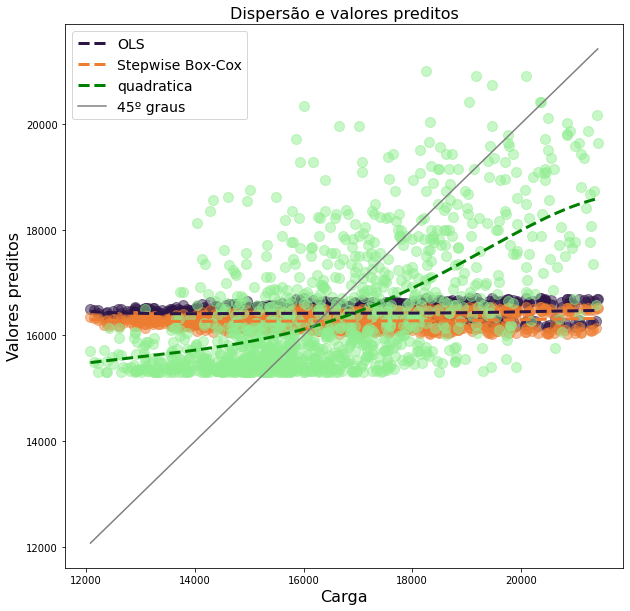

In [169]:
from scipy.optimize import curve_fit

def objective(x, a, b, c, d, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

xdata = df_gera['mean'].to_numpy()  # Convert to Numpy array
ydata_linear = df_gera['yhat_OLS'].to_numpy()  # Convert to Numpy array
ydata_bc = df_gera['yhat_bc'].to_numpy()  # Convert to Numpy array
ydata_qd = df_gera['yhat_qd'].to_numpy()  # Convert to Numpy array

plt.figure(figsize=(10, 10))

popt, _ = curve_fit(objective, xdata, ydata_linear)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='#2e1547', linewidth=3)

popt, _ = curve_fit(objective, xdata, ydata_bc)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='#ed7d31', linewidth=3)

popt, _ = curve_fit(objective, xdata, ydata_qd)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='green', linewidth=3)

plt.plot(x_line, x_line, color='gray', linestyle='-')
plt.scatter(xdata, ydata_linear, alpha=0.5, s=100, color='#2e1547')
plt.scatter(xdata, ydata_bc, alpha=0.5, s=100, color='#ed7d31')
plt.scatter(xdata, ydata_qd, alpha=0.5, s=100, color='lightgreen')
plt.xlabel('Carga', fontsize=16)
plt.ylabel('Valores preditos', fontsize=16)
plt.legend(['OLS', 'Stepwise Box-Cox', 'quadratica', '45º graus'], fontsize=14)
plt.title('Dispersão e valores preditos', fontsize=16)
plt.show()